<a href="https://colab.research.google.com/github/j-5912d/Math_Statistics/blob/main/HomeTask_9_Math_Stat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задача 1

1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):

zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].

Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная).

Произвести расчет как с использованием intercept, так и без.


In [1]:
import numpy as np
import scipy.stats as stats
import statistics
import warnings
import matplotlib.pyplot as plt

In [2]:
zp =np.array( [35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

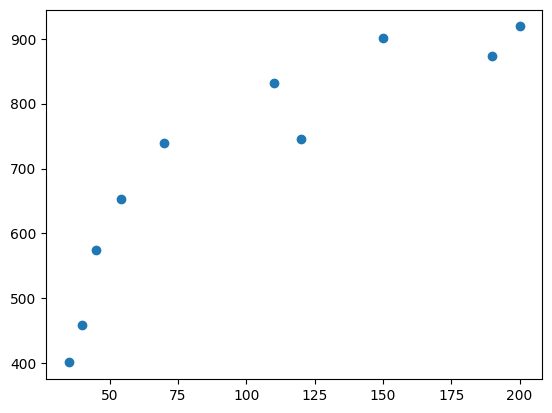

In [3]:
plt.scatter(zp, ks)

In [4]:
n = len(zp)
n

10

## 1-ый Способ

In [5]:
b1 = (n*np.sum(zp*ks) - np.sum(zp) * np.sum(ks))/(n * np.sum(zp**2) - np.sum(zp)**2)
b1

2.6205388824027653

In [6]:
ks_pred = b1 * zp
ks_pred

array([ 91.71886088, 117.92424971, 497.90238766, 524.10777648,
       104.8215553 , 183.43772177, 141.50909965, 393.08083236,
       314.46466589, 288.25927706])

([<matplotlib.lines.Line2D at 0x7ff6d2bc8400>],
 <matplotlib.collections.PathCollection at 0x7ff6d2bc9630>)

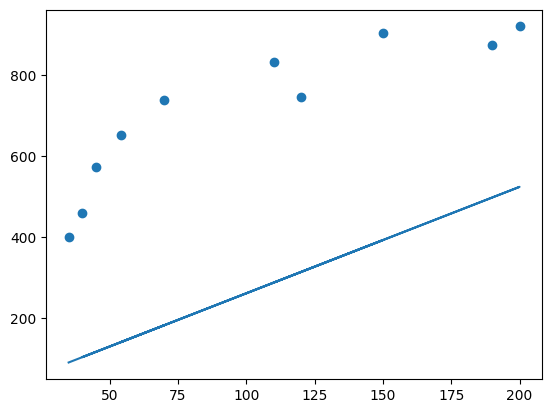

In [7]:
plt.plot(zp, ks_pred), plt.scatter(zp, ks)

Интерсепт должен быть найден в данной модели

## 2-ой Способ


In [8]:
b1_2 = (np.mean(zp*ks) - np.mean(zp) * np.mean(ks))/(np.mean(zp**2) - np.mean(zp)**2)
b1_2

2.620538882402765

In [9]:
b0_2 = np.mean(ks)-b1_2*np.mean(zp)
b0_2

444.1773573243596

In [10]:
ks_pred_2 = b0_2 + b1_2 * zp
ks_pred_2

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

([<matplotlib.lines.Line2D at 0x7ff6d2c41f00>],
 <matplotlib.collections.PathCollection at 0x7ff6d2c42170>)

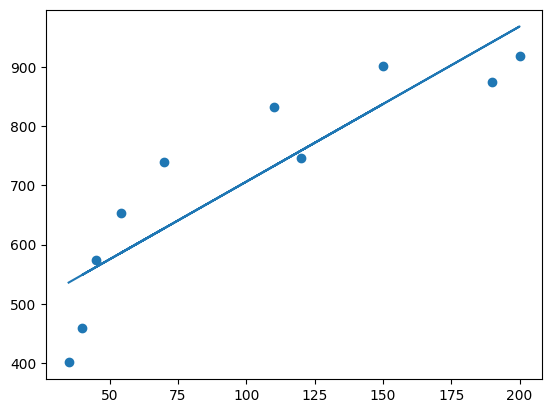

In [11]:
plt.plot(zp, ks_pred_2), plt.scatter(zp, ks)

Рассчитаем функцию потерь

In [12]:
mse = ((ks - ks_pred_2)**2).sum()/n
mse

6470.414201176658

Матричный метод

In [13]:
x = zp.reshape((n,1))
x

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [61]:
x = np.hstack([np.ones((n,1)), x])
x

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [15]:
y = ks.reshape((n,1))
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [16]:
b = np.dot(np.linalg.inv(np.dot(x.T,x)), x.T @ y)
b

array([[444.17735732],
       [  2.62053888]])

Посчитаем матрично без интерсепта


In [17]:
x = zp.reshape((n,1))
x

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [18]:
b = np.dot(np.linalg.inv(np.dot(x.T,x)), x.T @ y)
b

array([[5.88982042]])

In [19]:
y_pred = b[0] * zp
y_pred

array([ 206.1437147 ,  265.04191891, 1119.06587983, 1177.96408403,
        235.59281681,  412.28742941,  318.05030269,  883.47306302,
        706.77845042,  647.88024621])

([<matplotlib.lines.Line2D at 0x7ff6d2ae09d0>],
 <matplotlib.collections.PathCollection at 0x7ff6d2ae0c40>)

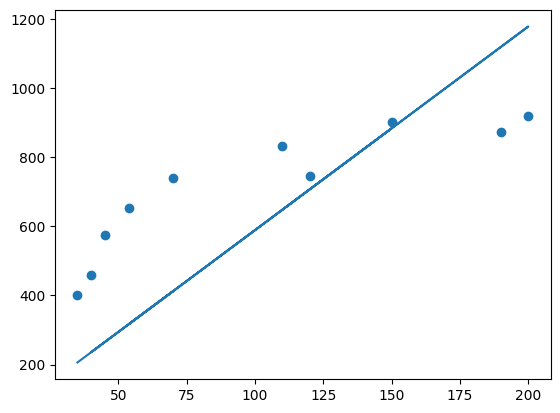

In [20]:
plt.plot(zp, y_pred), plt.scatter(zp, ks)

In [21]:
mse = ((ks - y_pred)**2).sum()/n
mse

56516.8584157194

Как мы видим модель без интерсепта имеет большую среднеквадратичную ошибку

# Задание 2

2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [22]:
n = len(zp)

In [23]:
def mse_(b1, ks = ks, zp = zp, n = len(zp)):
  return np.sum((b1*zp - ks)**2)/n

In [24]:
alpha = 1e-7

In [25]:
b1 = 1

In [26]:
for i in range(3000):
  b1 -= alpha * (2/n) * np.sum((b1 * zp - ks) * ks)
  if i % 100 == 0:
    print ('b1 = ', b1, 'mse = ', mse_(b1))

b1 =  1.09065704 mse =  373819.0845966792
b1 =  5.516171624901841 mse =  58440.256687689456
b1 =  6.377947878750929 mse =  59799.387073616344
b1 =  6.545760750553865 mse =  62444.346880747864
b1 =  6.578438791770443 mse =  63049.65685884134
b1 =  6.584802155714343 mse =  63170.95088131088
b1 =  6.586041287534211 mse =  63194.70013354175
b1 =  6.586282582497151 mse =  63199.32972415331
b1 =  6.5863295696362165 mse =  63200.23142654976
b1 =  6.5863387193972 mse =  63200.407021277606
b1 =  6.586340501121468 mse =  63200.44121494053
b1 =  6.586340848074944 mse =  63200.44787345025
b1 =  6.586340915636866 mse =  63200.44917005593
b1 =  6.586340928793135 mse =  63200.44942254275
b1 =  6.586340931355042 mse =  63200.449471709224
b1 =  6.58634093185392 mse =  63200.449481283395
b1 =  6.586340931951066 mse =  63200.44948314778
b1 =  6.586340931969983 mse =  63200.449483510805
b1 =  6.586340931973667 mse =  63200.449483581506
b1 =  6.586340931974384 mse =  63200.449483595265
b1 =  6.586340931974

In [27]:
ks_pred = b1 * zp
ks_pred

array([ 230.52193262,  296.38534194, 1251.40477708, 1317.26818639,
        263.45363728,  461.04386524,  355.66241033,  987.9511398 ,
        790.36091184,  724.49750252])

([<matplotlib.lines.Line2D at 0x7ff6d2b49b40>],
 <matplotlib.collections.PathCollection at 0x7ff6d2b49db0>)

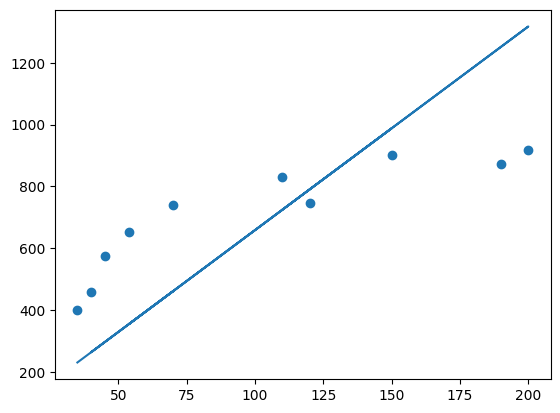

In [28]:
plt.plot(zp, ks_pred), plt.scatter(zp, ks)

В данном случае ошибка модели без интерсепта больше чем без него,  но рассчитанная в пункте 1

# Задание 3

3. Произвести вычисления как в пункте 2, но с вычислением intercept.

Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

Тут надо было всё тоже самое что и в предыдущем, только в матричном виде, чуть-чуть не успел, запутался в матрицах и работой с матрицами в питоне.

In [64]:
def mse_1(b, ks = x, zp = y, n = len(zp)):
  return np.sum((b*zp - ks)**2)/n

In [62]:
x = zp.reshape((n,1))
x = np.hstack([np.ones((n,1)), x])
x

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [63]:
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [39]:
alpha = 1e-7

In [69]:
b = np.array([1,1])
b

array([1, 1])

In [71]:
for i in range(3000):
  b -= alpha * (2/n) * np.sum((x@b - y)T @ y)
  if i % 100 == 0:
    print ('b = ', b, 'mse = ', mse_1(b))

SyntaxError: ignored

Ниже проверочный другой метод

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
model = LinearRegression()


In [31]:
x, y

(array([[ 35],
        [ 45],
        [190],
        [200],
        [ 40],
        [ 70],
        [ 54],
        [150],
        [120],
        [110]]),
 array([[401],
        [574],
        [874],
        [919],
        [459],
        [739],
        [653],
        [902],
        [746],
        [832]]))

In [32]:
regres = model.fit(x,y)

In [33]:
b0 = regres.intercept_
b0

array([444.17735732])

In [34]:
b1 = regres.coef_
b1

array([[2.62053888]])

In [35]:
ks_pred = b1[0] * zp + b0[0]
ks_pred

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

([<matplotlib.lines.Line2D at 0x7ff6d1b2aaa0>],
 <matplotlib.collections.PathCollection at 0x7ff6d1b2ad10>)

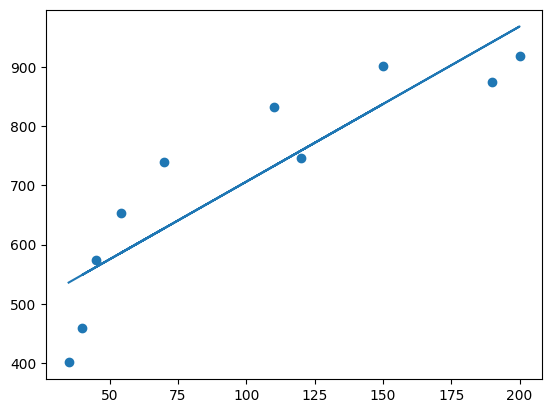

In [36]:
plt.plot(zp, ks_pred), plt.scatter(zp, ks)

In [37]:
mse = ((ks - ks_pred)**2).sum()/n
mse

6470.41420117666